# $\color{Green}{\text{Fundamentals of Inference and Learning}}$ 
## Homework 1 
### Exercise 1 : Statistical Inference and Maximum Likelihood

 1.
First we need to compute $Z(\lambda)$ in order to have a normalized distribution. We therefore have:
$$
\int_{-\infty}^{-\infty} p_\lambda (x_i)dx_i = 1 
\Leftrightarrow \int_{1}^{20} \frac{1}{Z(\lambda)}e^{\frac{-x_i}{\lambda}}dx_i = 1
$$
By integrating:
$$
-\frac{\lambda}{Z(\lambda)}*(e^{\frac{-20}{\lambda}}-e^{\frac{-1}{\lambda}}) = 1
$$
$Z(\lambda)$ is found to be : 
$$
    Z(\lambda) = -\lambda * (e^{\frac{-20}{\lambda}}-e^{\frac{-1}{\lambda}})
$$

Now compute $\mathbb{E}[X]$
$$
\mathbb{E}[X] = \int_{1}^{20} x_i \cdot \frac{1}{Z(\lambda)}e^{\frac{-x_i}{\lambda}}dx_i
$$
Let's integrate by parts:
$$
\mathbb{E}[X] = \frac{1}{Z(\lambda)} \{ -\lambda[20e^{-\frac{20}{\lambda}}-e^{-\frac{1}{\lambda}}] + \lambda \int_{1}^{20} e^{\frac{-x_i}{\lambda}}dx_i\}
$$
Finally:
$$
    \mathbb{E}[X] = -\frac{1}{Z(\lambda)} \{ \lambda[20e^{-\frac{20}{\lambda}}-e^{-\frac{1}{\lambda}}] + \lambda^2 [e^{-\frac{20}{\lambda}}-e^{-\frac{1}{\lambda}}]\}
$$ 

Now lets compute $\partial_\lambda log Z(\lambda)$:
$$
\partial_\lambda log Z(\lambda) = \frac{1}{\lambda(e^{\frac{-20}{\lambda}}-e^{\frac{-1}{\lambda}})} [-(e^{-\frac{20}{\lambda}}-e^{-\frac{1}{\lambda}})-\lambda(\frac{20e^{-\frac{20}{\lambda}}}{\lambda^2}-\frac{-e^{-\frac{1}{\lambda}}}{\lambda^2}] = -\frac{1}{Z(\lambda)} \{ \lambda[20e^{-\frac{20}{\lambda}}-e^{-\frac{1}{\lambda}}] + \lambda^2 [e^{-\frac{20}{\lambda}}-e^{-\frac{1}{\lambda}}]\}
$$

By comparing the previous result found for $\mathbb{E}[X]$, the final expression is:
$$
\mathbb{E}[X] = \lambda^2 \cdot \partial_\lambda Z(\lambda)
$$

In [90]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [91]:
exp = np.exp
exponential = np.random.exponential
np.random.seed(20)

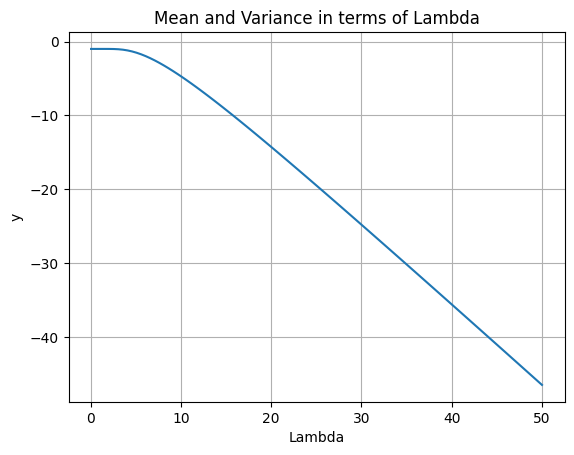

In [92]:
import math
import numpy as np
import matplotlib.pyplot as plt
lambda_values = np.linspace(0.05, 50, 100)
# Define the function z(lambda)
z = -lambda_values * (exp(-20 / lambda_values) - exp(-1 / lambda_values))
mean = -lambda_values / z * (20 * exp(-20 / lambda_values) + exp(-1 / lambda_values))

# Plot the results
plt.plot(lambda_values, mean)
#plt.plot(lambda_values, variance, color='g')
plt.xlabel('Lambda')
plt.ylabel('y')
plt.title('Mean and Variance in terms of Lambda')
plt.grid(True)
plt.show()


3.

In [93]:
def log_likelihood(lambda_, obs):
    log_likelihood_value = -len(obs) * np.log(-lambda_ * (np.exp(-20 / lambda_) - np.exp(-1 / lambda_)))
    log_likelihood_value = log_likelihood_value - np.sum(obs) / lambda_

    return log_likelihood_value

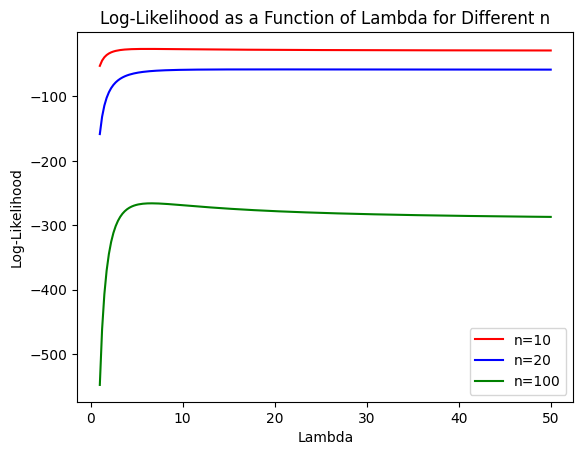

In [94]:
#parameters
lambda_ = 10
n_samples = [10,20,100]
tab_lambda = np.linspace(1,50,200)
color = ['r','b','g']
for index, N in enumerate(n_samples):
    obs = exponential(scale=lambda_, size=N)
    obs[obs > 20] = 0
    obs[obs < 1] = 0
    LL_func = np.array([log_likelihood(lbd, obs) for lbd in tab_lambda])
    plt.plot(tab_lambda,LL_func, color=color[index],label=f'n={N}')

plt.xlabel('Lambda')
plt.ylabel('Log-Likelihood')
plt.title('Log-Likelihood as a Function of Lambda for Different n')
plt.legend()
plt.show()

4.

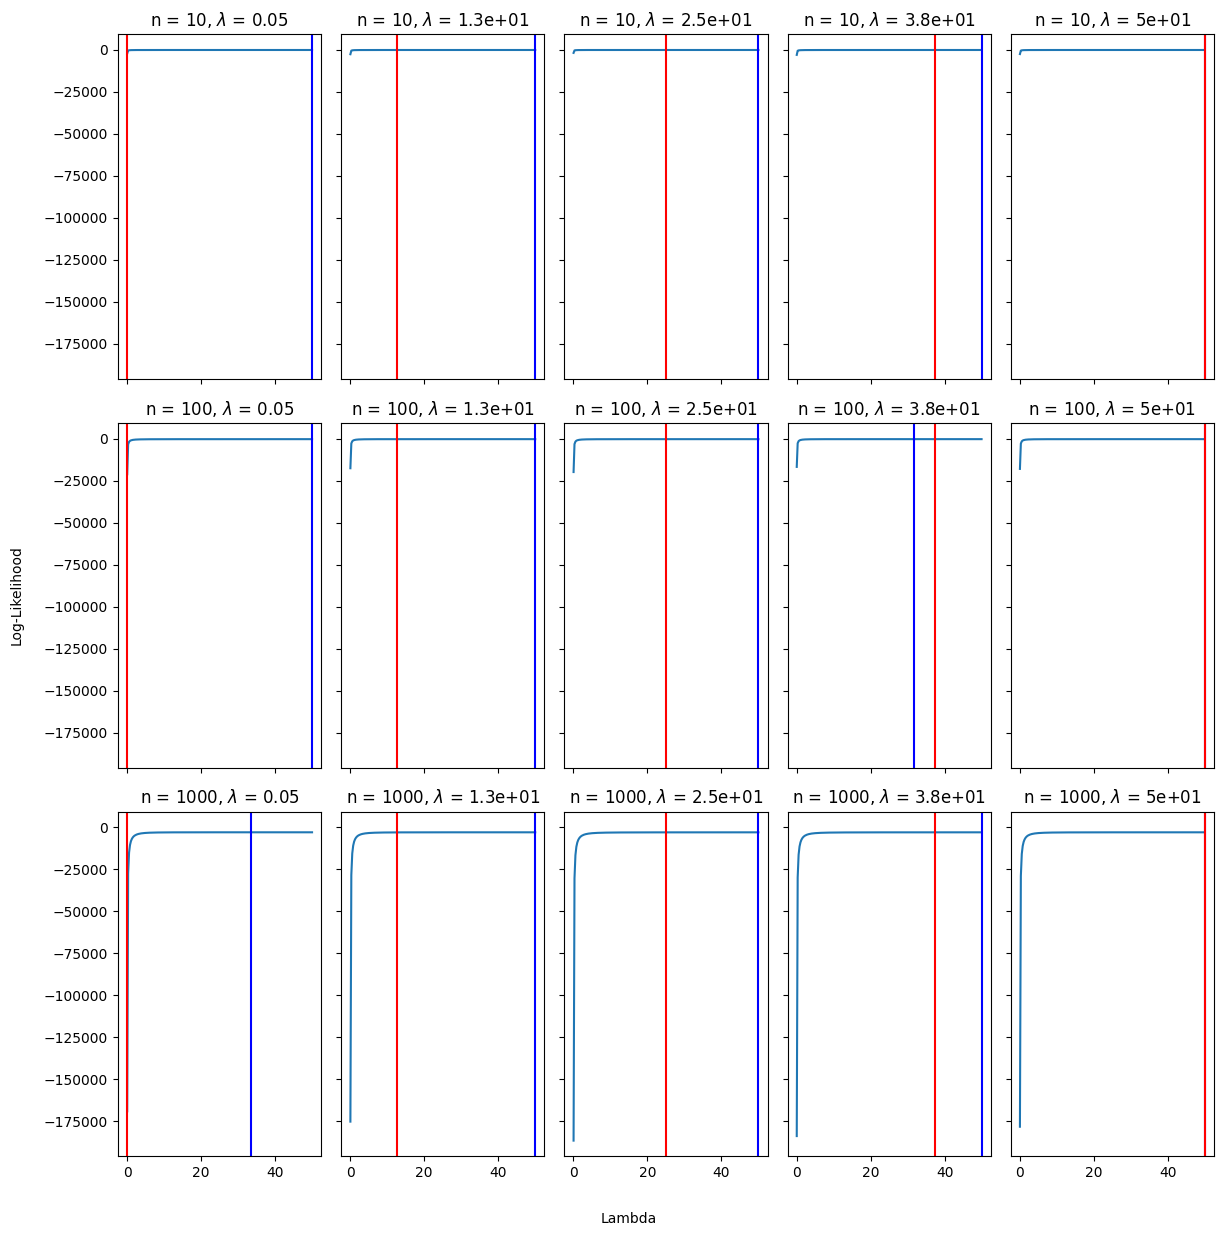

In [95]:
tab_N = [10,100,1000]
tab_lambda = np.linspace(0.05,50,5)
lambda_values = np.linspace(0.05,50,200)
lambda_bounds = [(0.05,50)]
fig, axes = plt.subplots(nrows=len(tab_N), ncols=len(tab_lambda), figsize=(12, 12), sharex=True, sharey=True)
for n_index, N in enumerate(tab_N):
    for lbd_index, lbd in enumerate(tab_lambda):
        x = exponential(scale=lambda_, size = N)
        y = log_likelihood(lambda_values,x)
        lambda_guess = np.random.uniform(0.05,50)
        optimum = minimize(lambda lbda: -log_likelihood(lbda,x),lambda_guess, bounds=lambda_bounds, method='Nelder-Mead')
        axes[n_index,lbd_index].plot(lambda_values,y, label = 'LL-function')
        axes[n_index,lbd_index].axvline(optimum.x, color='b', label = 'optimum')
        axes[n_index,lbd_index].axvline(lbd, color = 'r', label = 'true value')
        axes[n_index, lbd_index].set_title(rf'n = {N}, $\lambda$ = {lbd:.2}')

fig.text(0.5, -0.02, 'Lambda', ha='center', va='center')
fig.text(-0.01, 0.5, 'Log-Likelihood', ha='center', va='center', rotation='vertical')
plt.tight_layout();

### Exercise 2 Probability bounds and a pooling problem
1.

Starting from the definition
$$
P ( \frac { 1 } { m } \sum _ { i } z _ { i } \geq p + \varepsilon ) \leq e ^ { - 2 m \varepsilon ^ { 2 } } 
\Leftrightarrow P ( \sum _ { i } z _ { i } \geq m ( p + s ) ) \leq e ^ { - 2 m \varepsilon ^ { 2 } } 
$$
Using the hint given in the problem set:
$$
P ( e^{\lambda \sum _ { i } z _ { i }} \geq e^{\lambda m ( p + \varepsilon ) }) \leq e ^ { - 2 m \varepsilon ^ { 2 } } 
$$
Now let's apply Markov's inequality to the previous equation:
$$
P ( e^{\lambda\sum _ { i } z _ { i }} \geq e^{\lambda m ( p + \varepsilon ) }) \leq \frac{\mathbb{E}[e^{\lambda\sum _ { i } z _ { i }}]}{e^{\lambda m ( p + \varepsilon )}} = \frac{\prod _ { i }\mathbb{E}[e^{\lambda z _ { i }}]}{e^{\lambda m ( p + \varepsilon )}}
$$
For a Bernoulli variable:
$$
\mathbb{E}[e^{\lambda z _ { i }}] = \sum _ { i } e ^ { \lambda z ^ { i } } p ( Z = z _ { i } ) = e ^ { 0 } \cdot ( 1 - p ) + e ^ { \lambda } p = p e ^ { \lambda } + ( 1 - p )
$$
Finally:
$$
P ( e^{\lambda\sum _ { i } z _ { i }} \geq e^{\lambda m ( p + \varepsilon ) }) \leq \left(\frac{p e ^ { \lambda } + ( 1 - p )}{e^{\lambda ( p + \varepsilon )}}\right)^m \square
$$

3.
We have to differentiate $ log \left(\frac{p e ^ { \lambda } + ( 1 - p )}{e^{\lambda ( p + \varepsilon )}}\right)^m $ over $\lambda$ and solve $ \frac{\partial}{\partial\lambda} log \left(\frac{p e ^ { \lambda } + ( 1 - p )}{e^{\lambda ( p + \varepsilon )}}\right)^m = 0$ :

$$
\frac{\partial}{\partial\lambda} log \left(\frac{p e ^ { \lambda } + ( 1 - p )}{e^{\lambda ( p + \varepsilon )}}\right)^m = 
m \left( \frac{p e^\lambda}{pe^\lambda + (1-p)} - \frac{(p+\varepsilon)e^{\lambda(p+\varepsilon)}}{e^{\lambda(p+\varepsilon)}}\right) = 0$$
$$
\Leftrightarrow e^\lambda = \frac{(1-p)(p+\varepsilon)}{p(1-(p+\varepsilon))}
$$

Now let's rewrite $\left(\frac{p e ^ { \lambda } + ( 1 - p )}{e^{\lambda ( p + \varepsilon )}}\right)^m = e^{-mf(p,\varepsilon)}$ to find the value of $f(p, \varepsilon)$:

$$
log \left(\frac{p e ^ { \lambda } + ( 1 - p )}{e^{\lambda ( p + \varepsilon )}}\right) = -f(p,\varepsilon) \\
\Leftrightarrow f(p,\varepsilon) = -log\left(\frac{(1-p)(p+\varepsilon)}{1-(p+\varepsilon)}+(1-p)\right) + (p+\varepsilon)log\left(\frac{(1-p)(p+\varepsilon)}{1-(p+\varepsilon)}\right) \\
\Leftrightarrow f(p,\varepsilon) = (p+\varepsilon)log\left( \frac{p+\varepsilon}{p}\right) + (1-(p+\varepsilon))log(\frac{1-p+\varepsilon}{1-p}) \enspace\square
$$

3. 
a)
$$
f ( p , \varepsilon = 0 ) = p \log(\frac{p}{p} ) + ( 1 - p ) \log ( \frac { 1 - p } { 1 - p } ) = 0 \enspace\square
$$
b) 
$$
\frac { \partial f ( p , \varepsilon ) } { \partial \varepsilon} \Bigr|_{\varepsilon = 0} = \log ( \frac { p + \varepsilon } { p } ) + ( p + \varepsilon ) \cdot \frac { 1 } { p + \varepsilon } - \log ( \frac { 1 - ( p + \varepsilon ) } { 1 - p } ) - ( 1 - ( p + \varepsilon ) ) \frac { 1 } { 1 - ( p + \varepsilon ) } \Bigr|_{\varepsilon = 0} = \log ( \frac { p } { p } ) + 1 - \log ( \frac { 1 - p } { 1 - p } ) - 1 = 0 + 1 - 0 - 1 = 0 \enspace\square
$$
c)
$$
\frac { \partial ^ { \varepsilon} f ( p , \varepsilon ) } { d \varepsilon ^ { 2 } } = \frac { \partial } { \partial \varepsilon } \frac { \partial f ( p , \varepsilon ) } { \partial \varepsilon} = \frac { 1 } { p + \varepsilon } + \frac { 1 } { 1 - ( p + \varepsilon ) } = \frac { 1 } { ( p + \varepsilon ) ( 1 - ( p + \varepsilon ) ) } = \frac { 1 } {- ( p + \varepsilon ) ^ { 2 } + ( p + \varepsilon) } \enspace\square
$$

By analizing the polynôme $- ( p + \varepsilon ) ^ { 2 } + ( p + \varepsilon) $, one can see that it achieves a global maximum for $p + \varepsilon = \frac{1}{2}$ in the interval [0,1] which leads to a minimum value of 4 for the function $\frac { 1 } {- ( p + \varepsilon ) ^ { 2 } + ( p + \varepsilon) }$.
We finally get:
$$
\frac { \partial ^ { \varepsilon} f ( p , \varepsilon ) } { d \varepsilon ^ { 2 } } = \frac { 1 } {- ( p + \varepsilon ) ^ { 2 } + ( p + \varepsilon) } \geq 4,  \forall \varepsilon : 0\leq p+\varepsilon\leq 1 \enspace\square
$$

4.
$$
f(p, \varepsilon) = f(p, 0) + \varepsilon f'(p, 0) + \frac{\varepsilon^2 f''(p, \tilde{\varepsilon})}{2} = \frac{\varepsilon^2 f''(p, \tilde{\varepsilon})}{2}
$$
as $ f(p, 0) = \varepsilon f'(p, 0) = 0 $ from exercise 2.3. \
Using now the last result from 2.3 one obtain that : $f(p, \varepsilon) = \frac{\varepsilon^2 f''(p, \tilde{\varepsilon})}{2} \geq 2\varepsilon^2$
\ By combining this result with  $\left(\frac{p e ^ { \lambda } + ( 1 - p )}{e^{\lambda ( p + \varepsilon )}}\right)^m = e^{-mf(p,\varepsilon)}$ we get:
$$
\left(\frac{p e ^ { \lambda } + ( 1 - p )}{e^{\lambda ( p + \varepsilon )}}\right)^m \leq e^{-2m\varepsilon^2}
$$
Which finally prove the inequality:
$$
P ( \frac{1}{m}\sum _ { i } z _ { i } \geq ( p + \varepsilon ) ) \leq \left(\frac{p e ^ { \lambda } + ( 1 - p )}{e^{\lambda ( p + \varepsilon )}}\right)^m \leq e^{-2m\varepsilon^2} \square
$$

Bonus 2. \
$P ( |\frac{1}{m}\sum _ { i } z _ { i }-p| \geq \varepsilon ) =  P ( \frac{1}{m}\sum _ { i } z _ { i }-p \geq \varepsilon , \frac{1}{m}\sum _ { i } z _ { i }-p \leq \varepsilon) = 2P ( \frac{1}{m}\sum _ { i } z _ { i } \geq ( p + \varepsilon ) ) =  2e^{-2m\varepsilon^2} \square$

5. 
We can use the probability given in the bonus: $P ( |\frac{1}{m}\sum _ { i } z _ { i }-p| \geq \varepsilon ) \leq 2e^{-2m\varepsilon^2}$ \
and compute with the given values:
* $\varepsilon = 0.01 $
* $ 2e^{-2m\varepsilon^2} = 1-0.95 = 0.05$, as we want the probability to be inside the confidence intervall to be 95%. \
We can the solve for m:
$$
2e^{-2m\varepsilon^2} = 0.05 \Leftrightarrow m = -\frac{log(\frac{0.05}{2})}{2\cdot 0.01^2} = 18'444.40
$$
We have to interrogate at least 18'445 people to be sure to be in the confidence interval.

6. 
a)

In [96]:
from scipy.stats import bernoulli
def vote(m, p):
    return bernoulli.rvs(p, size=m)

In [97]:
m_star = 18445
p_tab = [0.2,0.5,0.8]
n_rep = 1000
for p in p_tab:
    p_inside = 0
    for i in range(n_rep):
        poll = vote(m_star,p)
        p_est = np.mean(poll)
        if(abs(p_est-p) <= 0.01):
            p_inside += 1
    p_inside = p_inside / n_rep
    print(rf'for a value p={p}, the probability that p is correct within 1% is {p_inside*100}% ')

for a value p=0.2, the probability that p is correct within 1% is 100.0% 
for a value p=0.5, the probability that p is correct within 1% is 99.8% 
for a value p=0.8, the probability that p is correct within 1% is 99.9% 


b)

It seems that the harder value to determine is for p =0.5 \
Furthermore, one can observe that this bound grossly overestimates the needed number. The number $m^* = 188445$ was set to be inside the confidence interval 95% of the time. However, from the results found above, it can be seen that, for the worst case, we are inside the confidence interval 99.8% of the time, which is significantly higher than what the bound suggests.

c)

In [106]:
m_tab = np.linspace(100,15000,10,dtype=int)
p_tab = [0.2,0.5,0.8]
n_rep = 1000
for p in p_tab:
    for m in m_tab:
        for i in range(n_rep):
            poll = vote(m,p)
            p_est = np.mean(poll)
            if(abs(p_est-p) <= 0.01):
                p_inside += 1
        p_inside = p_inside / n_rep
        print(rf'for p={p} and m = {m}, the probability that p is correct within 1% is {p_inside*100}% ')

for p=0.2 and m = 100, the probability that p is correct within 1% is 20.899597997595894% 
for p=0.2 and m = 1755, the probability that p is correct within 1% is 71.8208995979976% 
for p=0.2 and m = 3411, the probability that p is correct within 1% is 86.071820899598% 
for p=0.2 and m = 5066, the probability that p is correct within 1% is 92.4860718208996% 
for p=0.2 and m = 6722, the probability that p is correct within 1% is 96.1924860718209% 
for p=0.2 and m = 8377, the probability that p is correct within 1% is 98.09619248607181% 
for p=0.2 and m = 10033, the probability that p is correct within 1% is 98.49809619248607% 
for p=0.2 and m = 11688, the probability that p is correct within 1% is 99.89849809619248% 
for p=0.2 and m = 13344, the probability that p is correct within 1% is 99.69989849809619% 
for p=0.2 and m = 15000, the probability that p is correct within 1% is 99.99969989849811% 
for p=0.5 and m = 100, the probability that p is correct within 1% is 6.999999699898499% 
f

for p=0.2 and m = 5066, the probability that p is correct within 1% is 92.4860718208996% \
for p=0.2 and m = 6722, the probability that p is correct within 1% is 96.1924860718209%

for p=0.5 and m = 8377, the probability that p is correct within 1% is 92.89038597596011% \
for p=0.5 and m = 10033, the probability that p is correct within 1% is 95.79289038597597%

for p=0.8 and m = 5066, the probability that p is correct within 1% is 93.3837703095982% \
for p=0.8 and m = 6722, the probability that p is correct within 1% is 95.09338377030959% 

From these results one can obtain a rough value for each p:
* for p=02, we need around 6700 people.
* for p=05, we need around 10000 people
* for p=0.5 we need arounf 6700 people

It's good to notice that we obtain the same result for p=0.2 and p=0.8 which empasize that the probability is symmetric as it is binary.